**Universidad Nacional de Colombia**

**Math and Computer Science Department**

**Maths for Machine Learning**

**Ricardo Andrés Marino Rojas**

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


**NEEDED LIBRARIES**:

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = 10, 5
%matplotlib inline

**REMARK**: In order to run this notebook you most download the datasets used and the extract them into the current folder, this is, the folder were this file is. Take in mind, that this was made in Jupyter Notebook, so in the case you're working with Google Collaborative, you must upload the extracted dataset files into Google Collaborative.

# Specify which Machine Learning problem are you solving

## Banknote authentication data set
Day by day, millions or banknotes are printed by the government in order to supply the economy as needed. However, the criminal industry also produce their own fake banknotes, that are quite similar to the original ones. The problem being solved here is a classification problem. Given a new banknote-like specimen, verify if it's authentic or not.

## Occupancy detection data set
Determining if there's someone present in a room or not, is a task daily done by thousands of appliances. The problem being solved is a classification problem. Given the data at certain time of a room, determine if it's occupied or not.

# Provide a short summary of the features and the labels you are working on

## Banknote authentication data set

The data obtained were from the digitalization of genuine and forged banknote-like specimens. Using an industrial camera the banknotes were digitalized to then be processed with Wavelet Transform tool, in order to extract features from those images. But before describing the feauters we are working on, let's see a brief introdoction of what a Wavelet Transform is.

Signals are often used in this world to transfer different messages. Though they may seem noisy and irregular they often have certain structure that researchers study to develop better signal processing tools. One the of most famous methods in signal processing is the *Fourier Transform*, a technique developed by the french matematician Joseph Fourier that allows us the decompose a signal into a sum of pure functions with different frequencies. This tecnhique has been used broadly in many different fields, indeed, we couldn't have had quick phone calls without it. However, one downside of Fourier Transform is that, although we gain access to information about frequencies, we lose information about time. Actually, this a manifestation of Heisenberg uncertenity principle, there is always a trade off of information between time and frequency information.

Nevertheless, there can be made a compromise between both the frequency and the time information, this is in fact what Wavelet Transform does. In this tecnique we decompose our signal into a specialized family functions that satisfy certain restrictions in order to be able to give us somehow information about time and frequency of our signal. Wavelet transform is defined as a collection of a convolutions of the data function, $f(x_{i})$, with an appropriately shifted and streched function $\phi_{} ()$ called *wavelet* along a given time or space range:

$$W(a,x_{j})=\frac{1}{\sqrt{a}}\sum_{i=1}^{n} f(x_{i})\phi \left( \frac{x_{i}- x_{j}}{a}\right),$$

where $a$ is the scale factor determining the extent the wavelet is stretched or compressed, and $x_{j}$ is the extent of the shift with which the wavelet is moving along the time or space range.

Then the features extracted were the following ones:
* Variance of Wavelet Transformed image (continuous): Variance finds how each pixel varies from the neighborhood pixels and classifies them into different regions. 
* Skewness of Wavelet Transformed image (continuous): Skewness is the measure of the lack of symmetry.
* Curtosis of Wavelet Transformed image (continuous): Curtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
* Entropy of image (continuous): Image entropy is a quantity used to describe the amount of information that must be encoded for, by a compression algorithm.
* class (integer): Class containing two values 0 representing genuine banknote and 1 representing fake banknote.

## Occupancy Detection Data Set
Every minute a picture of certain room was taken, containing the following information:

* date time: The time were the picture of the room was taken, given in the format year-month-day hour:minute:second
* Temperature: The tempature of the room, given in Celsius
* Relative Humidity: The relative humidity of the room, given in percentage
* Light: Amount of light in the room, given in Lux
* CO2: Amount of C02 present in the room, given in ppm
* Humidity Ratio: This feature was a quantity derived from the temperature and relative humidity, it's given in kgwater-vapor/kg-air
* Occupancy: 0 or 1, 0 for not occupied, 1 for occupied status

# Please answer the following questions:

##  a) Are these datasets linearly separable?

In order to answer this question we will use the *Perceptron method*, this method is guaranteed to converge if the data is linearly separable (Novikoff, Albert J. (1963). "On convergence proofs for perceptrons". Office of Naval Research).

Perceptron is a machine learning algorithm that works as a classifier. Using a *threshold function*, it maps every input x (where x is a vector in $\mathbb{R}^{n}$) to an output $f(x)$ that can be either one of two possible values (usually denoted as $1$ and $0$).
$$f(x)=\begin{cases}
1\quad\text{if}\quad\mathbf{w}\cdot\mathbf{x}+\mathbf{b} \geq 0,\\
0\quad\text{otherwise}
\end{cases}$$

where $\mathbf{w}$ is called the *weight vector* (a vector in $\mathbb{R}^{n}$), the product $\mathbf{w}\cdot\mathbf{x}$ is the usual dot product and $\mathbf{b}$ is the *bias*, a real value introduced to push the decision boundary from the origin and it does not depend on the possible inputs.

The algorithms works as follows: Given two sets of points in $\mathbb{R}^{n}$ $A=\{a_{1},\dots,a_{m}\}$ and $B=\{b_{1},\dots,b_{l}\}$, a vector $\mathbf{x}=\{1,x_{1},\dots,x_{n}\}\in\mathbb{R}^{n+1}$, a defined weight vector $\mathbf{w}=\{\mathbf{b},w_{1},\dots,w_{n}\}\in\mathbb{R}^{n+1}$ and *learning rate* value $\mu$, we proceed as follows:

* 1) Compute the dot product between vectors $\mathbf{w}\cdot\mathbf{x}$
* 2) As the vector $\mathbf{x}$ is not defined, step 1 will produce a hyperplane. Check if any point in $A$ or $B$ has been misclassified with $f$(output 1 for a point in A, and 0 for a point in B). Pick the any misclassified point $c$ and set $d=-1$ if $f(c)=1$ and $c\in B$, if $f(c)=0$ and $c\in A$ then set $d=1$. If no points where misclassified, return hyperplane given by $\mathbf{w} \cdot \mathbf{x} = 0$ and end the algorithm.

* 3) Update $\mathbf{w}$ with $\mathbf{w}'$, where $\mathbf{w}'$ is defined as:
$$\mathbf{w}'=\mathbf{w}+ \mu * d * \mathbf{x}$$
* 4) Go back to step 1)

Now, let's use the following method to see if the Banknote and Occupancy dataset are linearly dataset. First, we create a method to read the dataset from a .txt  file

In [2]:
def ReadData(filepath):
    dataset=[]
    with open(filepath) as f:
        for line in f.readlines():
            raw_line=line.split(",")
            raw_line=[float(x) for x in raw_line]
            dataset.append(raw_line)
    return dataset

In the same way, we declare a method to create, train and test our Perceptron model from *Scikit-Learn* library

In [3]:
def MyPerceptron(X_test, y_test, X_train, y_train):
    random_state = 0
    
    # standarize the data like we did before, but use
    # the 'StandardScaler'
    
    # create the instance
    sc = StandardScaler()
    
    # fit the scaler to the training feature set ONLY
    sc.fit(X_train)

    # scale (transform) the training AND the testing sets
    # using the scaler that was fitted to traning data
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # it is important to transform non-numeric target
    # values into numbers prior to splitting the data
    # to avoid unexpected results when modeling
    print("Unique labels: {0}".format(np.unique(y)))
    
    # let's train a model using the sklearn
    # implementation of perceptron
    n_iter = 40
    eta0 = 0.1 # same as 'eta' (learning rate) in our implementation
    
    # create the perceptron instance
    ppn = Perceptron(max_iter=n_iter, eta0=eta0, random_state=random_state)
    
    # fit the model to the standarized data
    ppn.fit(X_train_std, y_train)
    
    # make predictions
    y_pred = ppn.predict(X_test_std)
    
    # we can measure performance using the 'accuracy_score'
    # convenience function in sklearn
    print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Once we have made this, we start by reading the first dataset, the occupancy dataset, who is given in two .txt files

In [5]:
dataset=[]
with open("datatest.txt") as f:
    title = True
    for line in f.readlines():
        # Ignore the labels
        if title == True:
            title = False
            continue
        
        # Split, ignore the dates and index values, and finally
        # convert the values to float
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        
        # Store the transformed sample
        dataset.append(raw_line)

X = []
y = []

# Extract the last value from the samples, which is the class of
# the sample
for entry in dataset:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0:
        y.append(0)
    else:
        y.append(1)

Make the same process with dataset number 2

In [6]:
dataset2 = []
with open("datatest2.txt") as f:
    title = True
    for line in f.readlines():
        if title == True:
            title = False
            continue
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        dataset2.append(raw_line)

for entry in dataset2:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0:
        y.append(0)
    else:
        y.append(1)

# Transform the list from datatest and datatest2 into a numpy array
X = np.array(X)
y = np.array(y)

Finally, read and store the training dataset

In [7]:
train_dataset = []
with open("datatraining.txt") as f:
    title = True
    for line in f.readlines():
        if title == True:
            title = False
            continue
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        train_dataset.append(raw_line)

X_train = []
y_train = []
for entry in train_dataset:
    row = entry[0:-1]
    X_train.append(np.array(row))
    if entry[-1] == 0:
        y_train.append(0)
    else:
        y_train.append(1)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

Now, use *MyPerceptron* function, declared above, to check whether the occupancy dataset is linearly separable or not

In [8]:
MyPerceptron(X,y, X_train, y_train)

Unique labels: [0 1]
accuracy: 96.34%


As you can see, the accuracy of our perceptron model with the testing dataset was about 96%, giving us a high probability of convergence. This means, there's a high chance of this dataset being linearly separable.

Furthermore, let's make the same process for the banknote dataset, in order to check if it's linearly separable 

In [9]:
dataset = ReadData("data_banknote_authentication.txt")

X = []
y = []
# Extract the classification label and store it in list y
for entry in dataset:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0.0:
        y.append(0)
    else:
        y.append(1)

# Transform both list to a np.array
X = np.array(X)
y = np.array(y)

In this case, we do not have a training dataset, so we will train our model with 70% of the samples from our dataset

In [10]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X, y_train, y = train_test_split(X, y, test_size=test_size, random_state=random_state)

Lastly, use our perceptron model to check whether our banknote dataset is linearly separable or not

In [11]:
MyPerceptron(X,y, X_train, y_train)

Unique labels: [0 1]
accuracy: 98.30%


The accuracy of our perceptron model with the testing data set was about 98%, giving us a high chance of convergence. This means, that there's a high probability that our banknote dataset is linearly separable

## b) Are these datasets randomly chosen?

A dataset is randomly chosen if for each sample there is the same probability of being chosen than for another one. Then, we need to check if this condition applies in both of our datasets. Let's first start with the banknote dataset

## Banknotes dataset

From the description of our banknote dataset we know that there was taken genuine and fake banknotes images to extract the different labels of each sample. Then, the genuine banknote labels should be similar between them, as well as for the fake banknotes with themselves. Thus, if we compute the average for each label, the ones from the genuine banknotes samples should look similar, and the same should happen for the fake ones. Let's see if our theory is correct

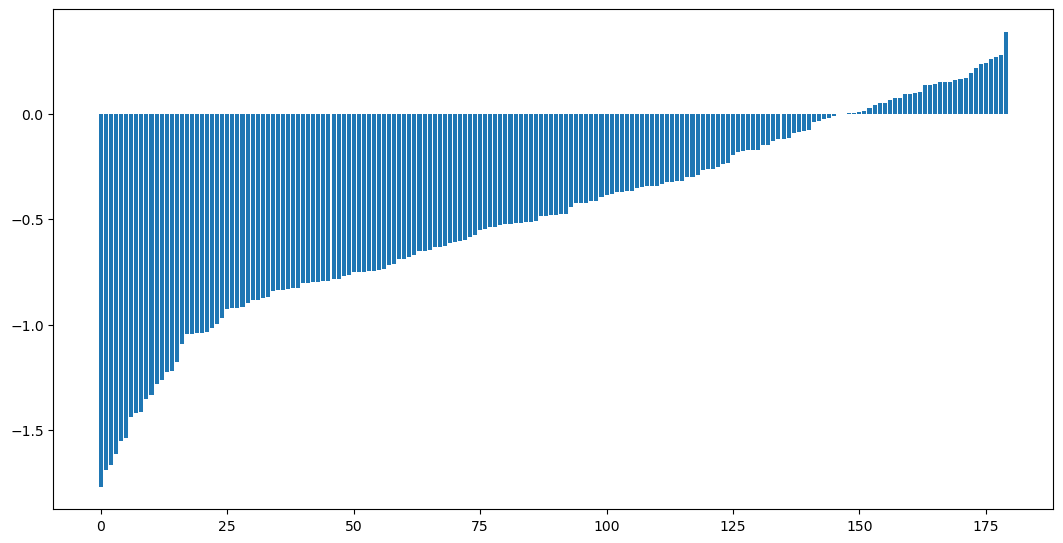

In [188]:
X_average_genuine = []
X_average_fake = []

# Get the average from each sample and store it according if it's genuine or fake
for i in range(0,len(X)):
    row = X[i]
    avg = np.average(row)
    if y[i] == 1:
        X_average_genuine.append(avg)
    else:
        X_average_fake.append(avg)

# Sort the average values to see in the plot the distribution they follow
X_average_genuine.sort()

# Plot the average values for the genuine banknotes
index=range(len(X_average_genuine))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index, X_average_genuine)
plt.show()

If the genuine samples were randomly chosen, the distribution of the averages would be roughly the same for all the samples, and that's what we can see in the plot. In general, values between $-1$ and $0$ are more likely to occur than values bigger than $0$. Then we can conclude, that the genuine banknotes samples were randomly chosen but bad quality bank notes were also chosen.

In the other hand, if we do the same process for the fake banknotes we will observe a similar behavior of the average distribution

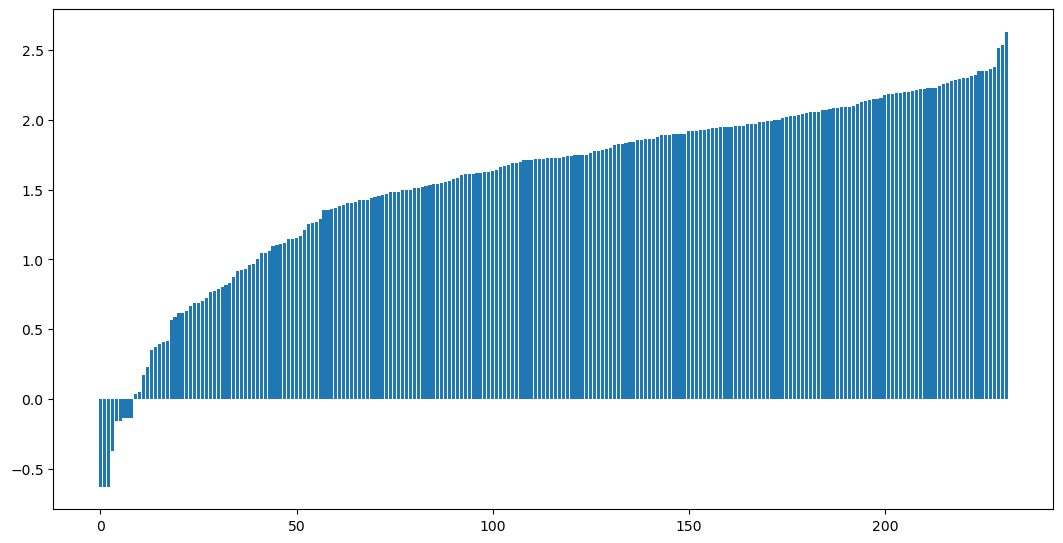

In [189]:
X_average_fake.sort()
index=range(len(X_average_fake))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index, X_average_fake)
plt.show()

From the plot, we observe how values between $-0.5$ and $0$ are less likely to occur than values from $0$ to $2$. So we conclude the same for this dataset portion, that it its samples has been randomly chosen but there was took in consideration high quality fake banknotes.

Finally, see the distribution of all the average values of the samples in the banknote dataset

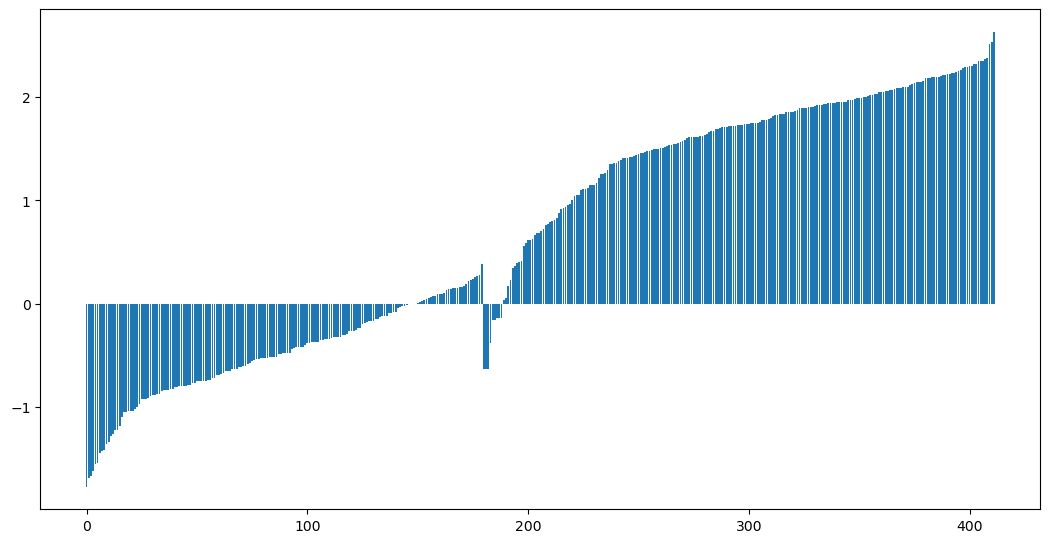

In [190]:
total_index = range(0,len(X))
total_samples_avg = X_average_genuine + X_average_fake
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(total_index, total_samples_avg)
plt.show()

## Occupancy dataset

If we consider the occupancy dataset we can see a similar behavior

In [191]:
dataset=[]
with open("datatest.txt") as f:
    title = True
    for line in f.readlines():
        # Ignore the labels
        if title == True:
            title = False
            continue
        
        # Split, ignore the dates and index values, and finally
        # convert the values to float
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        
        # Store the transformed sample
        dataset.append(raw_line)

X = []
y = []

# Extract the last value from the samples, which is the class of
# the sample
for entry in dataset:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0:
        y.append(0)
    else:
        y.append(1)

In [192]:
dataset2 = []
with open("datatest2.txt") as f:
    title = True
    for line in f.readlines():
        if title == True:
            title = False
            continue
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        dataset2.append(raw_line)

for entry in dataset2:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0:
        y.append(0)
    else:
        y.append(1)

# Transform the list from datatest and datatest2 into a numpy array
X = np.array(X)
y = np.array(y)

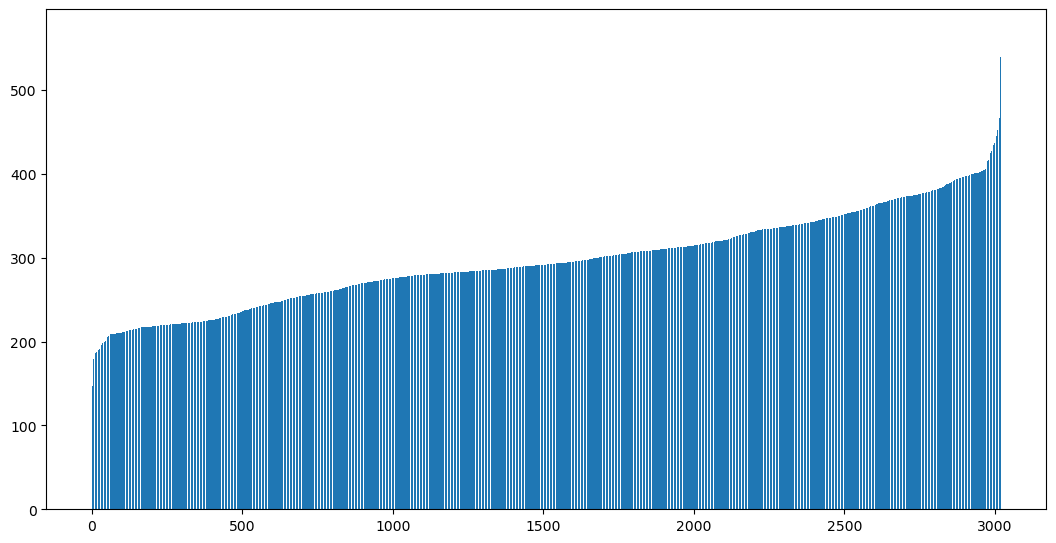

In [193]:
X_average_occupated = []
X_average_empty = []

# Get the average from each sample and store it according if it's genuine or fake
for i in range(0,len(X)):
    row = X[i]
    avg = np.average(row)
    if y[i] == 1:
        X_average_occupated.append(avg)
    else:
        X_average_empty.append(avg)

# Sort the average values to see in the plot the distribution they follow
X_average_occupated.sort()

# Plot the average values for the genuine banknotes
index=range(len(X_average_occupated))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index, X_average_occupated)
plt.show()

Though the average value among the sample averages is between $200$ and $300$, it can be seen a few samples with an average greater of equal to $400$. So this shows us how the probability of get certain sample is nearly the same for all, but there's a few ones with higher values than the average.

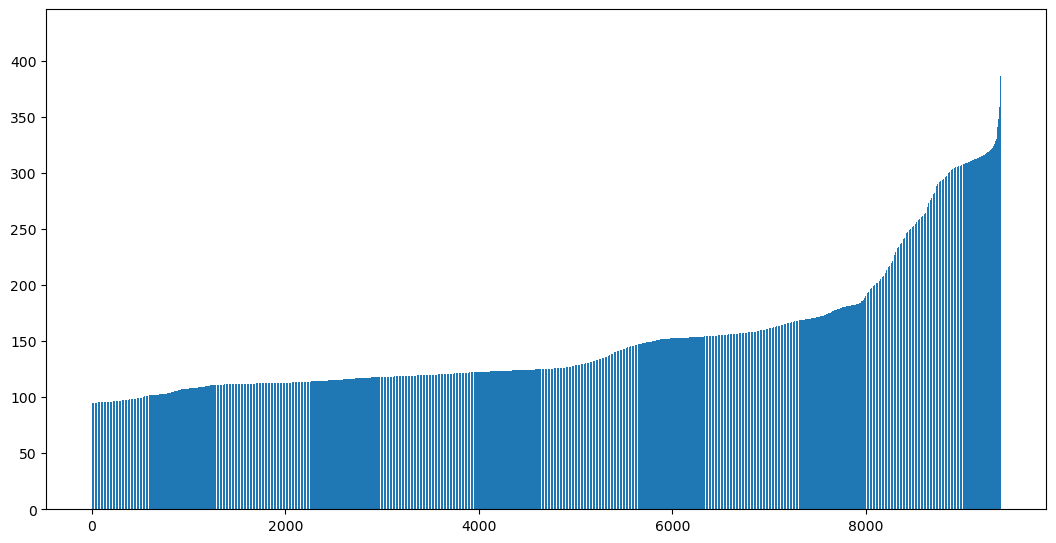

In [194]:
X_average_empty.sort()
index=range(len(X_average_empty))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index, X_average_empty)
plt.show()

In this case we can also conclude the same due to the fact that most samples values are between $100$ and $200$. However, as mentioned before, a few amount of the samples have a higher value than the average.

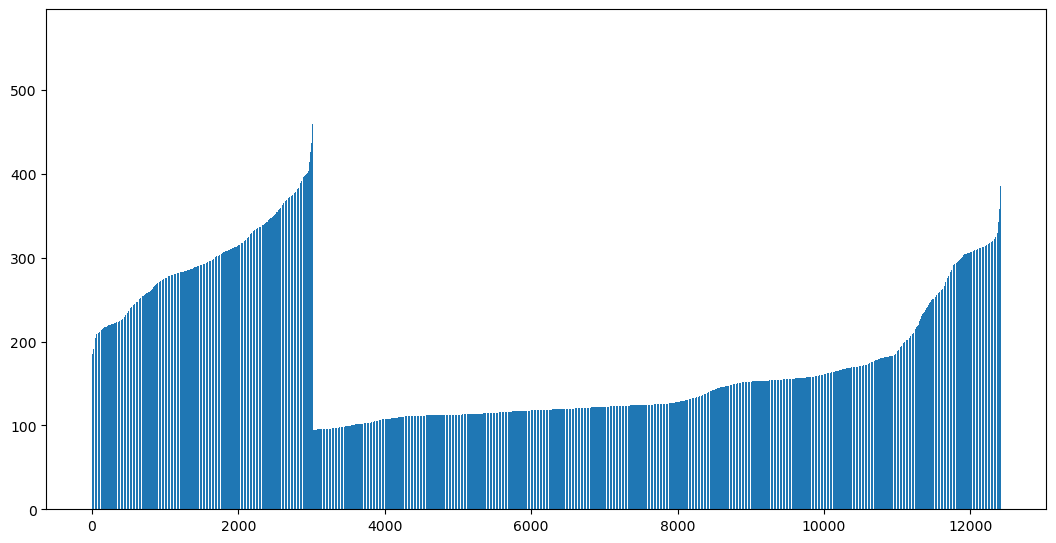

In [195]:
total_index = range(0,len(X))
total_samples_avg = X_average_occupated + X_average_empty
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(total_index, total_samples_avg)
plt.show()

## c) The sample size is enough to guarantee generalization.

If we consider the plots aforementioned, we see there's a significant representation of good genuine banknotes and genuine banknotes nearly similar to fake ones. Similarly, we can observe fake bank notes who are quite similar to genuine ones and other ones who are far from being a genuine banknote. Consequently, our sample size is big enough and have an significant representation of both genuine and fake banknotes, taking into account its quality, to guarantee generalization. 

# Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

*Support Vector Machine* is a machine learning algorithm used frequently in classification tasks. It's aim is construct one or more hyperplanes that separate a different sets of points. The quality or accuracy of a SVM is based on how far the constructed hyperplane is from the nearest points of different classes, since this minimizes the generalization error. Though in principle this method doesn't work with non-linearly separable datasets, it can be modified to obtain the hyperplane that gives the less amount of misclassified points. Below, it can be seen a hyperplane dividing a set of linearly separable points, and three points in its margin.
![SVM](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png)

Given a set of points $x_i\in\mathbb{R}^{p}$ from $i=1,\dots,n$ divided in two classes, and a vector $y\in\{1,-1\}^{n}$ which tells us the $i$th-point class, we want to find $x\in\mathbb{R}^{p}$ and $b\in\mathbb{R}$ such that the prediction obtained from $\text{sign}(w^{T}\phi(x)+b)$ is correct for most samples.The problem solved by a SMV or a SVC(Support Vector Classifier) is the following one:

$$\min_{w,b,\zeta} \frac{1}{2} w^{T} w + C \sum_{i=1}^{n}\zeta_{i}\\
\text{subject to } y_{i}(w^{T}\phi(x_{i}) + b) \geq 1 - \zeta_{i},\\
\zeta_{i} \geq 0, i=1,\cdots,n$$

Here we are trying to maximize the margin of our hyperplane (this is done minimizing $w^{T}w$) while reducing the penalty incurred by the number of misclassified points. As it was aforementioned, the hyperplane constructed should make no mistake, but in practice, due to the noise in most dataset, we allow some samples to be at certain distance $\zeta_{i}$ from the correct margin boundary. Indeed, the hyper-parameter $C$ defines how much penalized our decision function is after incurring in one misclassified point. Function $\phi$ in principle is the identity function but, if the problem is reformulated, it can be a mapping to a higher dimensional space ([See kernel trick](https://en.wikipedia.org/wiki/Kernel_method)).

Finally, we use the Coordinate Descent method to solve the optimization problem. This method will converge as long as our decision function is convex and differentiable (the data have high enough resolution) ([See](https://www.mit.edu/~dimitrib/PTseng/papers/archive/bcr_jota.pdf)). In this case, we use the [LIBLINEAR](https://www.jmlr.org/papers/volume9/fan08a/fan08a.pdf) library implemented Coordinate Descent method.

In [24]:
def MySVM(X_train, y_train):
    # it is important to transform non-numeric target
    # values into numbers prior to splitting the data
    # to avoid unexpected results when modeling
    print("Unique labels: {0}".format(np.unique(y)))
    
    # let's train a model using the sklearn
    # implementation of perceptron
    n_iter = 100
    random_state = 0
    
    # create the svc instance
    svm = SVC(kernel='linear', C=0.5)
    
    # fit the model to the standarized data
    svm.fit(X_train, y_train)
    return svm

# Show some examples to illustrate that the method is working properly

## [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [12]:
from sklearn import datasets

In [13]:
#load iris dataset from sklearn
iris = datasets.load_iris()

# separate features and targets
X = iris.data
y = iris.target

In [14]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [15]:
# standarize the data like we did before, but use
# the 'StandardScaler'
    
# create the instance
sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
# we will select a subset of the features
X_train_std = X_train_std[:,[2,3]]
X_test_std = X_test_std[:, [2,3]]

In [20]:
svm = MySVM(X_train_std, y_train)
# make predictions
y_pred = svm.predict(X_test_std)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1 2]
accuracy: 97.78%


<AxesSubplot:>

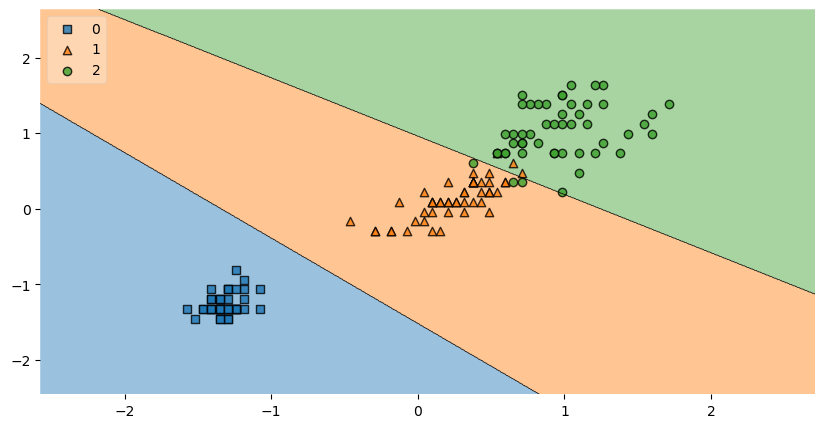

In [21]:
from mlxtend.plotting import plot_decision_regions
# with those modifications in place, we can specify the test
# indices; first we need re-combine the traning and testing
# datasets
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

# plot the decision regions
classifier = svm
test_idx = range(105, 150) # the indices of the samples in de test set
plot_decision_regions(X=X_combined_std, y=y_combined, clf=svm, legend=2)

## [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

In [22]:
wine = datasets.load_wine()

X = wine.data
y = wine.target

In [23]:
print(X.shape)

(178, 13)


In [24]:
print(y.shape)

(178,)


In [25]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [26]:
# standarize the data like we did before, but use
# the 'StandardScaler'
    
# create the instance
sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
# we will select a subset of the features
#X_train_std = X_train_std[:,[2,3]]
#X_test_std = X_test_std[:, [2,3]]

In [28]:
svm = MySVM(X_train_std, y_train)
# make predictions
y_pred = svm.predict(X_test_std)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1 2]
accuracy: 98.15%


# Provide quantitative evidence for generalization using the provided dataset

## Banknote dataset

Let's use SVC to classify the genuine and fake banknotes. We will use `accuracy_score()` function from Scikit Learn library to measure the error when predicting new values

In [29]:
dataset = ReadData("data_banknote_authentication.txt")

X = []
y = []
# Extract the classification label and store it in list y
for entry in dataset:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0.0:
        y.append(0)
    else:
        y.append(1)

# Transform both list to a np.array
X = np.array(X)
y = np.array(y)

In [30]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [31]:
# standarize the data like we did before, but use
# the 'StandardScaler'
    
# create the instance
sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
svm = MySVM(X_train_std, y_train)
# make predictions
y_pred = svm.predict(X_test_std)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1]
accuracy: 98.54%


Generalization means that our SVM can predict correctly non-previously observed data, which is exactly what our SVM did in this dataset, just misclassifying 2% of our dataset. Therefore, we can conclude that we've obtained generalization for this dataset with our SVM.  

## Occupancy dataset

Now let's do the same thing with the other dataset

In [33]:
dataset=[]
with open("datatest.txt") as f:
    title = True
    for line in f.readlines():
        # Ignore the labels
        if title == True:
            title = False
            continue
        
        # Split, ignore the dates and index values, and finally
        # convert the values to float
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        
        # Store the transformed sample
        dataset.append(raw_line)

X = []
y = []

# Extract the last value from the samples, which is the class of
# the sample
for entry in dataset:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0:
        y.append(0)
    else:
        y.append(1)

In [34]:
dataset2 = []
with open("datatest2.txt") as f:
    title = True
    for line in f.readlines():
        if title == True:
            title = False
            continue
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        dataset2.append(raw_line)

for entry in dataset2:
    row = entry[0:-1]
    X.append(np.array(row))
    if entry[-1] == 0:
        y.append(0)
    else:
        y.append(1)

# Transform the list from datatest and datatest2 into a numpy array
X = np.array(X)
y = np.array(y)

In [35]:
train_dataset = []
with open("datatraining.txt") as f:
    title = True
    for line in f.readlines():
        if title == True:
            title = False
            continue
        raw_line=line.split(",")
        raw_line=raw_line[2:]
        raw_line=[float(x) for x in raw_line]
        train_dataset.append(raw_line)

X_train = []
y_train = []
for entry in train_dataset:
    row = entry[0:-1]
    X_train.append(np.array(row))
    if entry[-1] == 0:
        y_train.append(0)
    else:
        y_train.append(1)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [36]:
# standarize the data like we did before, but use
# the 'StandardScaler'
    
# create the instance
sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X)

In [37]:
svm = MySVM(X_train_std, y_train)
# make predictions
y_pred = svm.predict(X_test_std)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y, y_pred)*100))

Unique labels: [0 1]
accuracy: 98.95%


Now, this tells us the accuracy of our SVM based on its prediction on both datasets. As you can see, our SVM made nearly no mistake classifying a not observed dataset, giving as a high confidence of generalization. 

# Feature engineering

In this last section we would like to analyze the feature engineering relevant details that could enhance the performance of the aforementioned model and even propose one which could perform better.

## One-Hot Encoding for occupancy dataset

If we look carefully, the Occupancy dataset posses a non-numerical feature called *date*, which had not been taking in consideration when training and testing the SVM model. However, this feature could contain relevant information about the occupancy of certain room, so removing it from the dataset could lead to a less informative dataset that could end up in a biased ML model.

In order to solve this problem we can use *One-Hot Encoding*, a method that transforms categorical features in several numerical or binary ones. This can be applied to our dataset in the following way

In [1]:
import pandas as pd

In [2]:
occupancy = pd.read_csv('datatest.txt')

In [3]:
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


Here we can see the format of our date feature, and how is the only categorical feature present in our dataset. Many ML models need numerical features to work and that's why we will transform this categorical feature into 3 or more numerical features

First, we need to convert the date into a DateTime Object

In [5]:
occupancy['date'] = pd.to_datetime(occupancy['date'])

In [6]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2665 non-null   datetime64[ns]
 1   Temperature    2665 non-null   float64       
 2   Humidity       2665 non-null   float64       
 3   Light          2665 non-null   float64       
 4   CO2            2665 non-null   float64       
 5   HumidityRatio  2665 non-null   float64       
 6   Occupancy      2665 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 166.6 KB


Once we've made this, we will use different to extract useful numerical features for our dataset

### Extract day

In [7]:
occupancy['date_day'] = occupancy['date'].dt.day
occupancy.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_day
2011,2015-02-03 21:29:59,21.000,26.200,0.0,619.250000,0.004027,0,3
529,2015-02-02 20:48:00,20.890,23.200,0.0,496.250000,0.003539,0,2
973,2015-02-03 04:12:00,20.350,22.500,0.0,429.200000,0.003319,0,3
306,2015-02-02 17:05:00,22.600,25.000,433.0,836.250000,0.004238,1,2
2694,2015-02-04 08:53:00,21.215,25.215,456.5,746.166667,0.003926,1,4


### Extract hour

In [8]:
occupancy['date_hour'] = occupancy['date'].dt.hour
occupancy.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_day,date_hour
2336,2015-02-04 02:55:00,20.700,25.00,0.0,483.333333,0.003770,0,4,2
2210,2015-02-04 00:49:00,20.790,25.00,0.0,532.000000,0.003792,0,4,0
2231,2015-02-04 01:09:59,20.790,24.89,0.0,523.000000,0.003775,0,4,1
2639,2015-02-04 07:58:00,20.700,24.50,408.0,546.250000,0.003695,1,4,7
1819,2015-02-03 18:17:59,22.445,30.10,0.0,1189.250000,0.005062,0,3,18


### Extract minutes

In [9]:
occupancy['date_minutes'] = occupancy['date'].dt.minute
occupancy.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_day,date_hour,date_minutes
557,2015-02-02 21:16:00,20.890000,22.945000,0.000000,485.250000,0.003500,0,2,21,16
2274,2015-02-04 01:53:00,20.700000,25.100000,0.000000,513.333333,0.003786,0,4,1,53
1324,2015-02-03 10:02:59,21.600000,27.600000,479.000000,1033.500000,0.004403,1,3,10,2
1276,2015-02-03 09:15:00,21.183333,25.198333,454.666667,754.333333,0.003916,1,3,9,15
2451,2015-02-04 04:50:00,20.700000,24.500000,0.000000,472.333333,0.003695,0,4,4,50


### Extract seconds

In [10]:
occupancy['date_seconds'] = occupancy['date'].dt.second
occupancy.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_day,date_hour,date_minutes,date_seconds
2018,2015-02-03 21:36:59,21.0,26.100000,0.000000,613.600000,0.004011,0,3,21,36,59
2392,2015-02-04 03:51:00,20.7,24.633333,0.000000,477.333333,0.003715,0,4,3,51,0
2631,2015-02-04 07:50:00,20.6,24.175000,407.500000,522.250000,0.003623,0,4,7,50,0
2409,2015-02-04 04:08:00,20.7,24.600000,0.000000,465.250000,0.003710,0,4,4,8,0
1195,2015-02-03 07:53:59,20.5,23.890000,407.666667,523.666667,0.003558,1,3,7,53,59


We decided to extract the day, hour and minute and not the month or year, because for our entire dataset the month and year are the same, so this is uninformative for our ML model.

Once we've done this, we can now remove the date feature

In [11]:
occupancy = occupancy.drop('date', axis=1)
occupancy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_day,date_hour,date_minutes,date_seconds
140,23.7000,26.272,585.200000,749.200000,0.004764,1,2,14,19,0
141,23.7180,26.290,578.400000,760.400000,0.004773,1,2,14,19,59
142,23.7300,26.230,572.666667,769.666667,0.004765,1,2,14,21,0
143,23.7225,26.125,493.750000,774.750000,0.004744,1,2,14,22,0
144,23.7540,26.200,488.600000,779.000000,0.004767,1,2,14,23,0


Let's see what happens when we train and test our SVM with this dataset

In [12]:
swap_list = ["date_day","date_hour","date_minutes","date_seconds","Temperature", "Humidity", "Light", "CO2", "HumidityRatio","Occupancy"]
occupancy = occupancy.reindex(columns=swap_list)
occupancy.head()

,date_day,date_hour,date_minutes,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2,14,19,0,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2,14,19,59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2,14,21,0,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2,14,22,0,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2,14,23,0,23.7540,26.200,488.600000,779.000000,0.004767,1


In [13]:
y = occupancy.iloc[:,9]
X = occupancy.iloc[:,:9]

In [16]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [17]:
# standarize the data like we did before, but use
# the 'StandardScaler'
    
# create the instance
sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [53]:
svm = MySVM(X_train_std, y_train)
# make predictions
y_pred = svm.predict(X_test_std)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1]
accuracy: 98.00%


## Normalization vs Standarization

Though both procedures are similar, if there is not enough time to run multiple experiments with the dataset, we use as a rule of thumb:
* unsupervised learning algorithms, in practice, more often benet from standardizationthan from normalization;
* standardization is also preferred for a feature if the values this feature takes are distributed close to a normal distribution (so-called bell curve);
* again, standardization is preferred for a feature if it can sometimes have extremely high or low values (outliers); this is because normalization will “squeeze” the normal values into a very small range;
* in all other cases, normalization is preferable.

Nevertheless, as our dataset is not too big, we can compare the results between both procedures

### Normalization

In [54]:
y = occupancy.iloc[:,9]
X = occupancy.iloc[:,:9

In [55]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [56]:
from sklearn.preprocessing import Normalizer
nz = Normalizer()
nz.fit(X_train)

X_train_nmz = nz.transform(X_train)
X_test_nmz = nz.transform(X_test)

In [57]:
svm = MySVM(X_train_nmz, y_train)
# make predictions
y_pred = svm.predict(X_test_nmz)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1]
accuracy: 96.88%


### Standardization

In [58]:
sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [59]:
svm = MySVM(X_train_std, y_train)
# make predictions
y_pred = svm.predict(X_test_std)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1]
accuracy: 98.00%


### Raw data

In [60]:
y = occupancy.iloc[:,9]
X = occupancy.iloc[:,:9]

In [61]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [62]:
svm = MySVM(X_train, y_train)
# make predictions
y_pred = svm.predict(X_test)
    
# we can measure performance using the 'accuracy_score'
# convenience function in sklearn
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Unique labels: [0 1]
accuracy: 98.00%


From the results we can conclude that standardize the dataset or using it without any procedure performs better for the SVM with the occupancy dataset.

## Learning Algorithm Selection

Now we would like the compare SVM algorithm with other ML algorithms to determine which one performs and adjusts better for this specific classification problem.

The occupancy classification problem looks to decide whether certain room is occupied or not. Thus, we do not need to explain any non-technical audience how or why our model works, they just need to now basic information about its usage. However, our dataset is linearly separable so using SVM with the linear kernel, logistic regression or linear regression can be a good choice. On the other hand, Deep Neural networks or ensemble algorithms might work better for this case but that kind of algorithms are known to be slow to train, rather than simple algorithms like SVM, linear regression as well as decision tree which are much faster to learn. Finally, when talking about prediction speed some algorithms like SVM, linear and logistic regression are extremely fast in this aspect, when compared with recurrent deep neural networks or kNN. Indeed, the user would like to know if certain room is empty or not in a blink of an eye, so that leads us to the following ML algorithms:
* SVM with linear kernel
* Linear Regression
* Logistic Regression

However, so far we've already seen how SVM with linear kernel performs for occupancy dataset, so let's find out whether linear regression or logistic regression can beat our SVM

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, f1_score

In [22]:
y = occupancy.iloc[:,9]
X = occupancy.iloc[:,:9]

In [23]:
# Now we'll use 'train_test_split' from sklearn
# to split the data into training and testing sets
test_size = 0.3
random_state = 0

# 'train_test_split' convinience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

sc = StandardScaler()
    
# fit the scaler to the training feature set ONLY
sc.fit(X_train)

# scale (transform) the training AND the testing sets
# using the scaler that was fitted to traning data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### SVM with linear kernel

In [25]:
svm = MySVM(X_train, y_train)
# make predictions
y_pred = svm.predict(X_test)

Unique labels: [0 1]


In [26]:
# The coefficients
print("Coefficients: \n", svm.coef_)
# The F1_score
print("F1_score: %.5f" % f1_score(y_test, y_pred))
print("R2_score: %.5f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-3.76220239e-01 -2.30058670e-02 -2.51424276e-03  1.68481067e-05
  -1.73254133e-02  3.86303494e-01  6.94394377e-03 -3.22519608e-03
   1.48973192e-04]]
F1_score: 0.97260
R2_score: 0.91265


### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train_std, y_train)

# make predictions
y_pred = lgr.predict(X_test_std)

In [29]:
# The coefficients
print("Coefficients: \n", lgr.coef_)
# TF1_score
print("F1_score: %.5f" % f1_score(y_test, y_pred))
print("R2_score: %.5f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.00507164 -1.20029353 -0.43563227  0.1135006  -1.20961341  1.651354
   4.62762595 -0.59195387  1.03280993]]
F1_score: 0.97084
R2_score: 0.90720


In [ ]:
def GetOccupancyData(textfile):
    

def TrainModels(cost_function, models, X, y):
    